## Evolution of the French Five-Act Comedy in Verse
In this analysis we will explore evolution of the French five-act comedy in verse based on the following features:
  - The number of dramatic characters;
  - The mobility coefficient;
  - The standard range of the speaking characters (sigma);
  - The percentage of non-dialogues;
  - The percentage of polylogues;
  - The percentage of monologues.

We will examine the following questions:
1. We will explore correlations between features;
2. We will check if the divergent behavior of the percentage of polylogues and monologues, which we have observed in the 10% sample data, is also present in the larger corpus;
3. We will examine distributions of the features and test them for normality using Shapiro-Wilk normality test. This will guide our choice of parametric vs. non-parametric statistical tests. If the features are not normally distributed, we will use non-parametric tests.
4. We will run statistical tests to determine whether our hypothesized periods (determined on the basis of the sample analysis) are significantly different:
    - Period one: from 1629 to 1650
    - Period two: from 1651 to 1695
    - Period three: from 1696 to 1795
    - Period four: from 1796 to 1847
4. We will create visualizations for the features;
5. We will run descriptive statistics for each period.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import shapiro

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# set the boundaries as we determined based on our analysis of a 10% sample
def determine_period(row):
    if row <= 1650:
        period = 1
    elif row >= 1651 and row <= 1695:
        period = 2
    elif row >= 1696 and row <= 1795:
        period = 3
    else:
        period = 4
    
    return period

In [3]:
def run_tests(test, feature):
    """
    The function allows us to run a statistical test of our choice on the adjacent periods.
    Params:
        test - a test of our choice, e.g., mannwhitneyu.
        feature - str, name of the feature we want to test on.
    Returns:
        no retun, prints the result of each test
    """
    result_one = test(period_one[feature], 
             period_two[feature]) 
    print('Period one and two:', '\n', feature, result_one)
    
    result_two = test(period_two[feature], 
             period_three[feature]) 
    print('Period two and three:', '\n', feature, result_two)
    
    result_three = test(period_three[feature], 
             period_four[feature]) 
    print('Period three and four:', '\n', feature, result_three) 

In [4]:
def summary(feature):
    mean = feature.mean()
    std = feature.std()
    median = feature.median()
    
    return mean, std, median

In [5]:
def make_plot(feature, title):
    mean, std, median = summary(feature)
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=17)
    sns.distplot(feature, kde=False)
    mean_line = plt.axvline(mean, 
                            color='black',
                            linestyle='solid', 
                            linewidth=2); M1 = 'Mean';
    median_line = plt.axvline(median, 
                               color='green',linestyle='dashdot', 
                               linewidth=2); M2='Median'
    std_line = plt.axvline(mean + std, 
                           color='black',
                           linestyle='dashed', 
                           linewidth=2); M3 = 'Standard deviation';
    plt.axvline(mean - std, 
                color='black',
                linestyle='dashed', 
                linewidth=2)

    plt.legend([mean_line, median_line, std_line], [M1, M2, M3])
    plt.show()

In [6]:
# read the data
data = pd.read_csv('../French_Comedies/Data/French_Comedies_Data.csv')

In [7]:
data.shape

(279, 25)

In [8]:
# read the sample data
sample_df = pd.read_csv('../French_Comedies/Data/French_Comedies_Data_Sample.csv')

In [9]:
# exclude the comedies used for the sample analysis
not_sample = data[~data['index'].isin(sample_df['index'])].copy()

In [10]:
not_sample.shape

(250, 25)

In [11]:
not_sample.columns

Index(['index', 'title', 'last_name', 'first_name', 'date',
       'translation/adaptation/contrastive', 'num_acts', 'url',
       'num_present_characters', 'num_scenes_text', 'num_scenes_iarkho',
       'speech_distribution', 'percentage_monologues', 'percentage_duologues',
       'percentage_non_duologues', 'percentage_above_two_speakers',
       'av_percentage_non_speakers', 'sigma_iarkho',
       'number_scenes_with_discontinuous_change_characters',
       'percentage_scenes_with_discontinuous_change_characters',
       'total_utterances', 'num_verse_lines', 'dialogue_vivacity',
       'five_year_intervals', 'decades'],
      dtype='object')

In [12]:
# include only five act comedies and only the comedies that are not translations/adaptations 
original_comedies = not_sample[(not_sample['num_acts'] ==5)&
                               (not_sample['translation/adaptation/contrastive'] == 0)].copy()

In [13]:
original_comedies.head()

,index,title,last_name,first_name,date,translation/adaptation/contrastive,num_acts,url,num_present_characters,num_scenes_text,...,percentage_above_two_speakers,av_percentage_non_speakers,sigma_iarkho,number_scenes_with_discontinuous_change_characters,percentage_scenes_with_discontinuous_change_characters,total_utterances,num_verse_lines,dialogue_vivacity,five_year_intervals,decades
2,F_3,Mélite ou Les fausses lettres,Corneille,Pierre,1629,0,5,http://www.theatre-classique.fr/pages/document...,8,35,...,23.08,0.513,0.906,12,30.769,483.0,1822.0,0.265,1630,1630
3,F_5,La Veuve ou Le Traître trahi,Corneille,Pierre,1633,0,5,http://www.theatre-classique.fr/pages/document...,12,40,...,20.00,3.519,1.062,12,26.667,521.0,2010.0,0.259,1635,1640
6,F_11,La Galerie du Palais,Corneille,Pierre,1634,0,5,http://www.theatre-classique.fr/pages/document...,12,53,...,24.53,0.000,1.148,10,18.868,517.0,1794.0,0.288,1635,1640
7,F_12,La Suivante,Corneille,Pierre,1634,0,5,http://www.theatre-classique.fr/pages/document...,10,47,...,10.64,0.000,0.753,11,23.404,410.0,1700.0,0.241,1635,1640
8,F_7,Les Vendanges de suresnes,du Ryer,Pierre,1635,0,5,http://www.theatre-classique.fr/pages/document...,11,36,...,43.59,1.923,1.476,13,33.333,589.0,1837.0,0.321,1635,1640


In [14]:
original_comedies.shape

(228, 25)

In [15]:
# sort by date
sorted_comedies = original_comedies.sort_values(by='date')

In [16]:
# create time periods based on our hypothesized periodization
sorted_comedies['period'] = sorted_comedies['date'].apply(determine_period)

In [17]:
# rename column names for clarity
sorted_comedies = sorted_comedies.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                 'percentage_non_duologues': 'percentage_non_dialogues',
                                                  'percentage_above_two_speakers': 'percentage_polylogues'})

In [18]:
# define the features we want to analyze
features = ['num_present_characters', 
            'mobility_coefficient',
            'sigma_iarkho',
            'percentage_monologues', 
            'percentage_non_dialogues', 
            'percentage_polylogues']

## Part 1. Feature Correlations

In [19]:
sorted_comedies[features].corr()

,num_present_characters,mobility_coefficient,sigma_iarkho,percentage_monologues,percentage_non_dialogues,percentage_polylogues
num_present_characters,1.000000,0.163464,0.364450,-0.165619,0.126711,0.199131
mobility_coefficient,0.163464,1.000000,-0.055484,0.338866,-0.019938,-0.247541
sigma_iarkho,0.364450,-0.055484,1.000000,-0.229503,0.523382,0.491242
percentage_monologues,-0.165619,0.338866,-0.229503,1.000000,-0.121777,-0.777040
percentage_non_dialogues,0.126711,-0.019938,0.523382,-0.121777,1.000000,0.718147
percentage_polylogues,0.199131,-0.247541,0.491242,-0.777040,0.718147,1.000000


Iarkho's major claim was that the features such as number of present characters in a play, mobility coefficient (or number of scenes), standard range of the speaking characters (sigma), and percentage of non-dialogues are highly correlated (above 0.9). However, we do not observe such strong positive correlations between these features. 
This could have a few possible explanations: either these features are not universal (i.e., their behavior in comedies differs from their behavior in tragedies) or there is a problem with Iarkho's claim. We will need to do a follow-up analysis of Iarkho's data to determine whether the latter is the case. This finding makes it clear that we will need to treat each feature independently, there is no "bundle of features" that show an identical behavior on which Iarkho performed his synthesis operations. 

## Part 2. The Percentage of Non-Dialogues, Polylogues, and Monologues

In our analysis of the sample, we observed that the percentage of polylogues and monologues have divergent trends. The analysis of the correlations reveals that they have a strong negative correlation (-0.778). Our observations of the divergent trends between polylogues and monologyes in the sample data are also apparent in the larger corpus. 

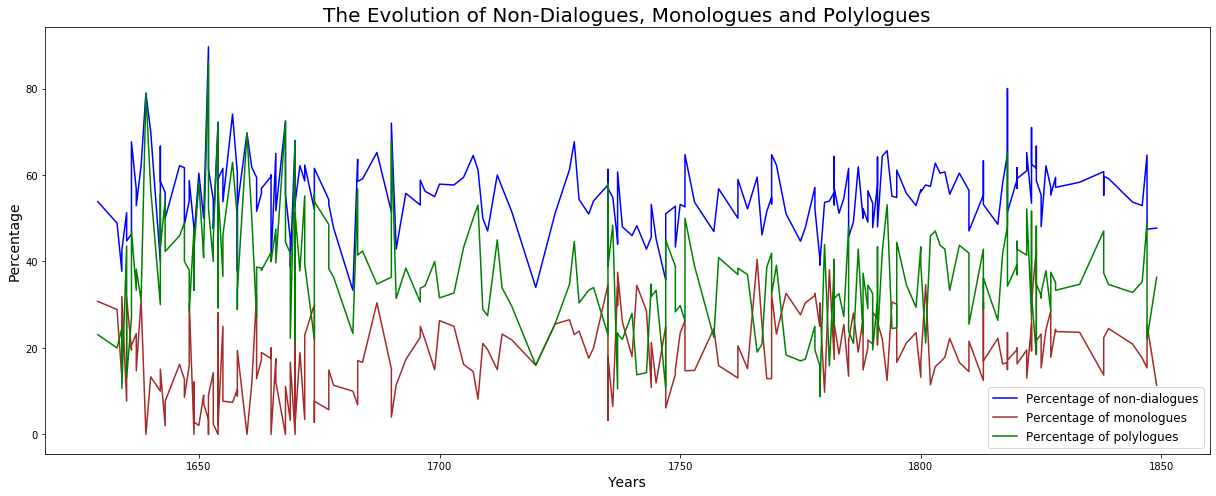

In [20]:
plt.figure(figsize=(17, 7))
plt.title('The Evolution of Non-Dialogues, Monologues and Polylogues', fontsize=20)
plt.plot(sorted_comedies['date'], sorted_comedies['percentage_non_dialogues'], color='b', label='Percentage of non-dialogues')
plt.plot(sorted_comedies['date'], sorted_comedies['percentage_monologues'], color='brown', label='Percentage of monologues')
plt.plot(sorted_comedies['date'], sorted_comedies['percentage_polylogues'], color='green', label='Percentage of polylogues')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.tight_layout()
plt.show()

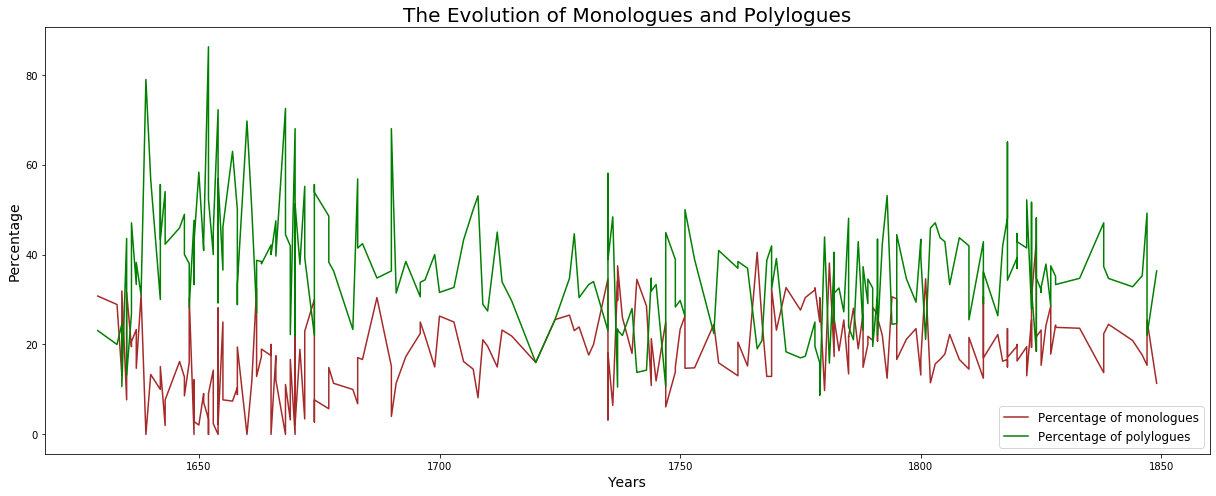

In [21]:
plt.figure(figsize=(17, 7))
plt.title('The Evolution of Monologues and Polylogues', fontsize=20)
plt.plot(sorted_comedies['date'], sorted_comedies['percentage_monologues'], color='brown', label='Percentage of monologues')
plt.plot(sorted_comedies['date'], sorted_comedies['percentage_polylogues'], color='green', label='Percentage of polylogues')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.tight_layout()
plt.show()

## Part 3. Feature Distributions and Normality

In this section we will plot the distribution of each feature and run Shapiro-Wilk test for normality. If the features are normally distributed, we will be able to use parametric statistical tests for further analysis. Otherwise, we will have to use non-parametric tests.

### How will we check normality?
For each feature, will run the Shapiro-Wilk test.We will set the significance level at 0.05. If the p-value returned by the test will be below 0.05, we will reject the null hypothesis of the normal distribution of the feature. Otherwise, we will fail to reject the hypothesis.

### Number of Dramatic Characters

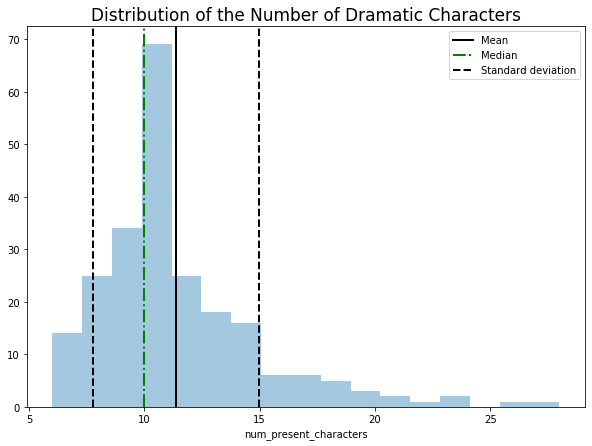

In [22]:
make_plot(sorted_comedies['num_present_characters'], 
         'Distribution of the Number of Dramatic Characters')

In [23]:
mean, std, median = summary(sorted_comedies['num_present_characters'])
print('Mean number of dramatic characters:', round(mean, 2))
print('Standard deviation of the number of dramatic characters:', round(std, 2))
print('Median number of dramatic characters:', median)

Mean number of dramatic characters: 11.38
Standard deviation of the number of dramatic characters: 3.59
Median number of dramatic characters: 10.0


### Shapiro-Wilk Normality Test

In [24]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sorted_comedies['num_present_characters'])[1])

The p-value of the Shapiro-Wilk normality test: 2.459339426986312e-13


The data is right-skewed: there are a few comedies with the number of dramatic characters above 15. The Shapiro-Wilk test showed that the probability that the data is normally distributed is extremely low (p-value is 2.459339426986312e-13).

### Mobility Coefficient

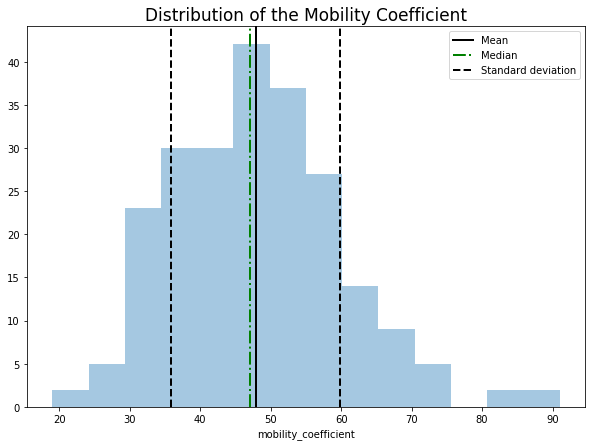

In [25]:
make_plot(sorted_comedies['mobility_coefficient'], 
         'Distribution of the Mobility Coefficient')

In [26]:
mean, std, median = summary(sorted_comedies['mobility_coefficient'])
print('Mean mobility coefficient:', round(mean, 2))
print('Standard deviation of the mobility coefficient:', round(std, 2))
print('Median mobility coefficient:', median)

Mean mobility coefficient: 47.87
Standard deviation of the mobility coefficient: 11.96
Median mobility coefficient: 47.0


### Shapiro-Wilk Normality Test

In [27]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sorted_comedies['mobility_coefficient'])[1])


The p-value of the Shapiro-Wilk normality test: 0.001137901097536087


The Shapiro-Wilk normality test shows that the probability of this feature of being normally distributed in 0.001137901097536087.

### Standard Range of the Number of Speaking Characters (Sigma)

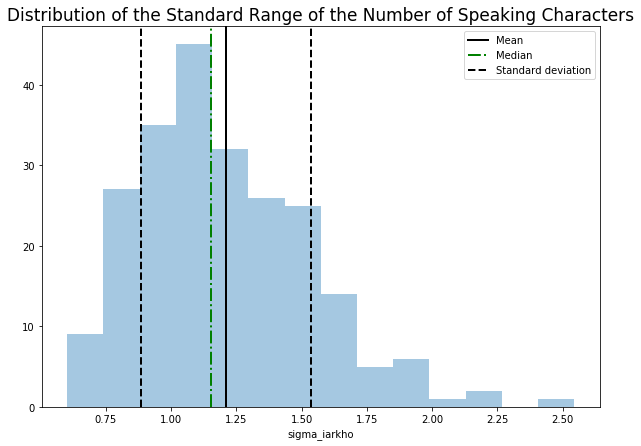

In [28]:
make_plot(sorted_comedies['sigma_iarkho'], 
         'Distribution of the Standard Range of the Number of Speaking Characters')

In [29]:
mean, std, median = summary(sorted_comedies['sigma_iarkho'])
print('Mean standard range:', round(mean, 2))
print('Standard deviation of the standard range:', round(std, 2))
print('Median standard range:', median)

Mean standard range: 1.21
Standard deviation of the standard range: 0.32
Median standard range: 1.1535000000000002


### Shapiro-Wilk Normality Test

In [30]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sorted_comedies['sigma_iarkho'])[1])

The p-value of the Shapiro-Wilk normality test: 9.61293790169293e-06


The feature is also right-skewed. The Shapiro-Wilk normality test showed that its probability of being normally distributed is extremely low (p-value = 9.61293790169293e-06).

### The Percentage of Non-Dialogues

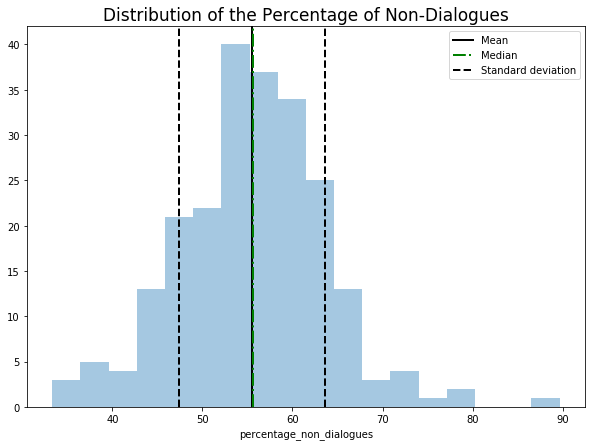

In [31]:
make_plot(sorted_comedies['percentage_non_dialogues'], 
         'Distribution of the Percentage of Non-Dialogues')

In [32]:
mean, std, median = summary(sorted_comedies['percentage_non_dialogues'])
print('Mean percentage of non-dialogues:', round(mean, 2))
print('Standard deviation of percentage of non-dialogues:', round(std, 2))
print('Median percentage of non-dialogues:', median)

Mean percentage of non-dialogues: 55.55
Standard deviation of percentage of non-dialogues: 8.11
Median percentage of non-dialogues: 55.56


### Shapiro-Wilk Normality Test

In [33]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sorted_comedies['percentage_non_dialogues'])[1])

The p-value of the Shapiro-Wilk normality test: 0.008053966797888279


The Shapiro-Wilk showed that the data that the probability of the data of being normally distrubted is very low (0.008053966797888279).

### The Percentage of Polylogues

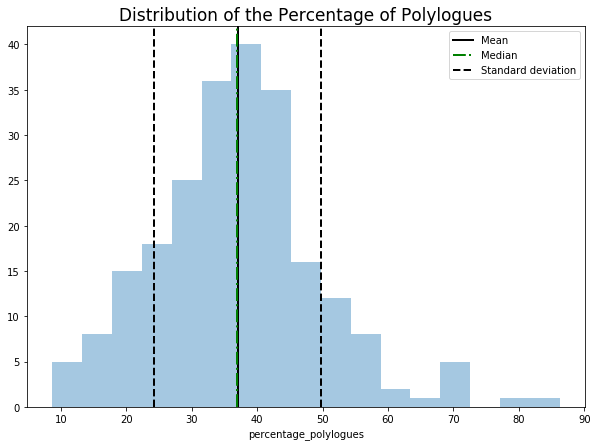

In [34]:
make_plot(sorted_comedies['percentage_polylogues'], 
         'Distribution of the Percentage of Polylogues')

In [35]:
mean, std, median = summary(sorted_comedies['percentage_polylogues'])
print('Mean percentage of polylogues:', round(mean, 2))
print('Standard deviation of percentage of polylogues:', round(std, 2))
print('Median percentage of polylogues:', median)

Mean percentage of polylogues: 37.03
Standard deviation of percentage of polylogues: 12.75
Median percentage of polylogues: 36.94


### Shapiro-Wilk Normality Test

In [36]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sorted_comedies['percentage_polylogues'])[1])

The p-value of the Shapiro-Wilk normality test: 0.0007369017694145441


The distribution of the percentage of polylogues is right-skewed. The probability of it being normally distrubted is 0.0007369017694145441.

### The Percentage of Monologues

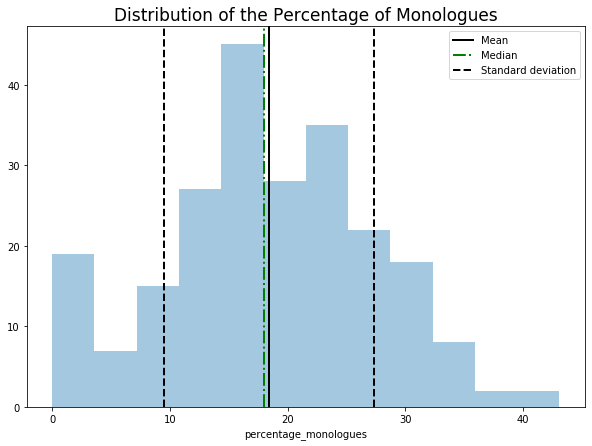

In [37]:
make_plot(sorted_comedies['percentage_monologues'], 
         'Distribution of the Percentage of Monologues')

In [38]:
mean, std, median = summary(sorted_comedies['percentage_monologues'])
print('Mean percentage of monologues:', round(mean, 2))
print('Standard deviation of percentage of monologues:', round(std, 2))
print('Median percentage of monologues:', median)

Mean percentage of monologues: 18.43
Standard deviation of percentage of monologues: 8.92
Median percentage of monologues: 18.03


### Shapiro-Wilk Normality Test

In [39]:
print('The p-value of the Shapiro-Wilk normality test:', shapiro(sorted_comedies['percentage_monologues'])[1])

The p-value of the Shapiro-Wilk normality test: 0.1087605431675911


The Shapiro-Wilk normality test showed that the probability that the percentage of monologues is normally distributed is above 5%. The p-value is 0.1087605431675911. Therefore, we fail to reject the hypothesis that the percentage of monologues is normally distributed.

## Summary:
Out of five examined features, we can be confident that only the percentage of monologues is normally distributed. Therefore, it is more appropriate to use **non-parametric statistical tests** (the Kruskal-Wallis H-test for all time periods, and, in case of a significant **Kruskal-Wallis test**, followed by **the Mann-Whitney rank test** to see where the differences occur.

In [40]:
from scipy.stats import kruskal, mannwhitneyu

## Part 4. Hypothesis Testing

We will run statistical tests to determine whether our hypothesized periods (determined on the basis of the sample analysis) are significantly different:
   - Period one: from 1629 to 1650
   - Period two: from 1651 to 1695
   - Period three: from 1696 to 1795
   - Period four: from 1796 to 1847
   
First, we will use *scipy.stats* Python library and run **the Kruskal-Wallis test** to see whether there are significant differences between any periods at all. Our null hypothesis will be that there is no difference between the four periods. Our alternative hypothesis will be that the time periods are different. We will set the significance level at 0.05. If the p-value is lower than 0.05, we will reject the null hypothesis of no difference. Otherwise, we will fail to reject the null hypothesis.

Second, if we observe that there are significant differences between time periods based on the results of the Kruskal-Wallis test, we will investiage further to see where the differences actually occur. We will run the **Mann-Whitney u-test** to check whether there is a difference between period one and two, period two and three, period three and four. The null hypothesis will be no difference between these periods, whereas the alternative hypothesis will be that the periods will be different. We will set the significance level at 0.05. If the p-value produced by the **Mann-Whitney u-test** will be below 0.05. We will reject the null hypothesis of no difference.

There are 27 comedies in period one, 56 in period two, 91 in period three, and 54 in period four.

In [41]:
# define each period
period_one = sorted_comedies[sorted_comedies.period == 1].copy()
period_two = sorted_comedies[sorted_comedies.period == 2].copy()
period_three = sorted_comedies[sorted_comedies.period == 3].copy()
period_four = sorted_comedies[sorted_comedies.period == 4].copy()

In [42]:
period_one.shape

(27, 26)

In [43]:
period_two.shape

(56, 26)

In [44]:
period_three.shape

(91, 26)

In [45]:
period_four.shape

(54, 26)

### The Number of Dramatic Characters

#### The Kruskal-Wallis Test

In [46]:
kruskal(period_one['num_present_characters'],
        period_two['num_present_characters'],
        period_three['num_present_characters'],
        period_four['num_present_characters'])

KruskalResult(statistic=8.600737702953268, pvalue=0.03509840710855357)

The p-value (0.03509840710855357) is below 0.05. Therefore, we reject the null hypothesis of no difference between the periods based on the number of dramatic characters. Now, we will need to find out where the differences occur.

#### The Mann-Whitney u-test

In [47]:
run_tests(mannwhitneyu, 'num_present_characters')

Period one and two: 
 num_present_characters MannwhitneyuResult(statistic=590.5, pvalue=0.053242044360330774)
Period two and three: 
 num_present_characters MannwhitneyuResult(statistic=1931.0, pvalue=0.006652289382092168)
Period three and four: 
 num_present_characters MannwhitneyuResult(statistic=1958.5, pvalue=0.01981851389569999)


Based on the results of the Mann-Whitney u-test, there is a statistically significant difference between period two and three (p-value is 0.006652289382092168, below 0.05) and between periods three and four (p-value of 0.01981851389569999 is below 0.05). However, there is no statistically significant difference between period one and two as the p-value of 0.053242044360330774 is slightly above 0.05.

## Mobility Coefficient

#### The Kruskal-Wallis Test

In [48]:
kruskal(period_one['mobility_coefficient'],
        period_two['mobility_coefficient'],
        period_three['mobility_coefficient'],
        period_four['mobility_coefficient'])

KruskalResult(statistic=45.90463378164536, pvalue=5.942554326253018e-10)

The p-value (5.942554326253018e-10) is below 0.05. Therefore, we reject the null hypothesis of no difference between the periods based on mobility coefficient. 

#### The Mann-Whitney U-Test

In [49]:
run_tests(mannwhitneyu, 'mobility_coefficient')

Period one and two: 
 mobility_coefficient MannwhitneyuResult(statistic=652.0, pvalue=0.1569680303368749)
Period two and three: 
 mobility_coefficient MannwhitneyuResult(statistic=1639.5, pvalue=0.00014498866002731796)
Period three and four: 
 mobility_coefficient MannwhitneyuResult(statistic=1755.5, pvalue=0.002055779873641289)


The same trend is observed. The Mann-Whitney u-test showed that there is a statistically significant difference between period two and three (p-value is 0.00014498866002731796, below 0.05) and between periods three and four (p-value of 0.002055779873641289 is below 0.05). However, there is no statistically significant difference between period one and two as the p-value of 0.1569680303368749 is above 0.05 significance level. It means that there is 15% chance that they belong to the same distribution.

## The Standard Range of the Number of Speaking Characters (Sigma)

#### The Kruskal-Wallis Test

In [50]:
kruskal(period_one['sigma_iarkho'],
        period_two['sigma_iarkho'],
        period_three['sigma_iarkho'],
        period_four['sigma_iarkho'])


KruskalResult(statistic=15.224019337577682, pvalue=0.0016348792826840503)

The p-value (0.0016348792826840503) is below 0.05. Therefore, we reject the null hypothesis of no difference between the periods based on the standard range of the number of speaking characters (sigma).

#### The Mann-Whitney U-Test

In [51]:
run_tests(mannwhitneyu, 'sigma_iarkho')

Period one and two: 
 sigma_iarkho MannwhitneyuResult(statistic=746.0, pvalue=0.4632132094298613)
Period two and three: 
 sigma_iarkho MannwhitneyuResult(statistic=2018.0, pvalue=0.0173389729947035)
Period three and four: 
 sigma_iarkho MannwhitneyuResult(statistic=1510.5, pvalue=5.465555136781202e-05)


Once again, the same trend is observed. The Mann-Whitney u-test showed that there is a statistically significant difference between period two and three (p-value is 0.0173389729947035, below 0.05) and between periods three and four (p-value of 5.465555136781202e-05 is below 0.05). However, there is no statistically significant difference between period one and two as the p-value of 0.4632132094298613 is much higher than 0.05 significance level. It means that there is 46.3% chance that they belong to the same distribution.

## The Percentage of Non-Dialogues

Even though we don't have much trust in this feature, we will still run the tests for it.

#### The Kruskal-Wallis Test

In [52]:
kruskal(period_one['percentage_non_dialogues'],
        period_two['percentage_non_dialogues'],
        period_three['percentage_non_dialogues'],
        period_four['percentage_non_dialogues'])


KruskalResult(statistic=15.855985039851063, pvalue=0.001213739715750228)

The p-value (0.001213739715750228) is below 0.05. Therefore, we reject the null hypothesis of no difference between the periods even based on the percentage of non-dialogues.

#### The Mann-Whitney U-Test

In [53]:
run_tests(mannwhitneyu, 'percentage_non_dialogues')

Period one and two: 
 percentage_non_dialogues MannwhitneyuResult(statistic=623.5, pvalue=0.09971913560681733)
Period two and three: 
 percentage_non_dialogues MannwhitneyuResult(statistic=1939.5, pvalue=0.0076469551821206965)
Period three and four: 
 percentage_non_dialogues MannwhitneyuResult(statistic=1490.5, pvalue=3.892206774179382e-05)


The Mann-Whitney u-test showed that there is a statistically significant difference between period two and three (p-value is 0.0076469551821206965, below 0.05) and between periods three and four (p-value of 3.892206774179382e-05 is below 0.05). However, we again observe that there is no statistically significant difference between period one and two as the p-value of 0.09971913560681733 is above 0.05 significance level. It means that there is 9.9% chance that they belong to the same distribution.

## The Percentage of Polylogues

#### The Kruskal-Wallis Test

In [54]:
kruskal(period_one['percentage_polylogues'],
        period_two['percentage_polylogues'],
        period_three['percentage_polylogues'],
        period_four['percentage_polylogues'])

KruskalResult(statistic=35.00743347440888, pvalue=1.2138522697949172e-07)

The Kruskal-Wallis test showed a statistically significant result. The p-value (1.2138522697949172e-07) is much lower than 0.05. Therefore, we reject the null hypothesis of no difference between the periods even based on the percentage of polylogues.

#### The Mann-Whitney U-Test

In [55]:
run_tests(mannwhitneyu, 'percentage_polylogues')

Period one and two: 
 percentage_polylogues MannwhitneyuResult(statistic=620.0, pvalue=0.09387929212862983)
Period two and three: 
 percentage_polylogues MannwhitneyuResult(statistic=1170.0, pvalue=1.9543367160901918e-08)
Period three and four: 
 percentage_polylogues MannwhitneyuResult(statistic=1592.0, pvalue=0.0002033113578176082)


The Mann-Whitney u-test showed that there is a statistically significant difference between period two and three (p-value is 1.9543367160901918e-08, below 0.05) and between periods three and four (p-value of 0.0002033113578176082 is below 0.05). However, we again observce that there is no statistically significant difference between period one and two as the p-value of 0.09387929212862983 is above 0.05 significance level. It means that there is 9.39% chance that they belong to the same distribution.

## The Percentage of Monologues

#### The Kruskal-Wallis Test

In [56]:
kruskal(period_one['percentage_monologues'],
        period_two['percentage_monologues'],
        period_three['percentage_monologues'],
        period_four['percentage_monologues'])

KruskalResult(statistic=46.59604074238203, pvalue=4.2359444687722217e-10)

The Kruskal-Wallis test showed a statistically significant result. The p-value (4.2359444687722217e-10) is much lower than 0.05. Therefore, we reject the null hypothesis of no difference between the periods even based on the percentage of monologues.

#### The Mann-Whitney U-Test

In [57]:
run_tests(mannwhitneyu, 'percentage_monologues')

Period one and two: 
 percentage_monologues MannwhitneyuResult(statistic=629.0, pvalue=0.10929919858320902)
Period two and three: 
 percentage_monologues MannwhitneyuResult(statistic=1010.0, pvalue=4.303409424347983e-10)
Period three and four: 
 percentage_monologues MannwhitneyuResult(statistic=2039.5, pvalue=0.044047098331829695)


The Mann-Whitney u-test showed that there is a statistically significant difference between period two and three (p-value is 4.303409424347983e-10, below 0.05). Based on the percentage of monologues, the difference between periods three and four is not as well-pronounced: it is marginally below 0.05 (p-value of 0.044047098331829695).

However, we again observce that there is no statistically significant difference between period one and two as the p-value of 0.10929919858320902 is above 0.05 significance level. It means that there is 10.93% chance that they belong to the same distribution.

## Summary

### Period One and Two

|Feature                    | P-Value              | Test Result
|---------------------------| ----------------|--------------------------------
|  Number of dramatic characters | 0.053242044360330774 | Not significant
|Mobility coefficient|0.1569680303368749 |Not significant
|  The standard range of the number of speaking characters |0.4632132094298613 |  Not significant
| The percentage of non-dialogues | 0.09971913560681733|  Not significant
| The percentage of polylogues | 0.09387929212862983|  Not significant
| The percentage of monologues| 0.10929919858320902|  Not significant

### Period Two and Three

|Feature                    | P-Value              | Test Result
|---------------------------| ----------------|--------------------------------
|  Number of dramatic characters | 0.006652289382092168 | Significant
|Mobility coefficient|0.00014498866002731796|Significant
|  The standard range of the number of speaking characters |0.0173389729947035|  Significant
| The percentage of non-dialogues |0.0076469551821206965 |  Significant
| The percentage of polylogues | 1.9543367160901918e-08|  Significant
| The percentage of monologues|4.303409424347983e-10 |  Significant

### Period Three and Four

|Feature                    | P-Value              | Test Result
|---------------------------| ----------------|--------------------------------
|  Number of dramatic characters |  0.01981851389569999| Significant
|Mobility coefficient|0.002055779873641289|Significant
|  The standard range of the number of speaking characters |5.465555136781202e-05|  Significant
| The percentage of non-dialogues | 3.892206774179382e-05|  Significant
| The percentage of polylogues |0.0002033113578176082 |  Significant
| The percentage of monologues|0.044047098331829695 |  Significant

Based on the testing we conclude, that periods two and three and three and four are statistically different. However, at this point we fail to reject the hypothesis of no difference between periods two and three. Therefore, we end up with three distinct literary periods.

## Comparison with Boris Iarkho's Periodization of Tragedies

In his study of the five-act tragedy, Boris Iarkho distinguished five time periods. However, Iarkho's early Romantic period entirely consisted of German tragedies and does not represent the French tradition. The French tragedies form four periods:
- Barocco-influenced early Corneille
- Mature Neoclassicism (the seventeenth century)
- Late Neoclassicism (the eighteenth century)
- Moderate Romanticism.

In the analysis of the French five-act comedy in verse, we hypothesizes that there are four period. However, our tests showed that three of them are statistically different, whereas the difference between period one (from 1629 to 1650) and period two (from 1651 to 1695) is not significantly different based on all features.

## Updated Periodization: Three Periods

- Period one: from 1629 to 1695
- Period two: from 1696 to 1795
- Period three: from 1796 to 1847

In [58]:
# update the boundaries as we determined based on our hypothesis testing
def determine_period(row):
    if row <= 1695:
        period = 1
    elif row >= 1696 and row <= 1795:
        period = 2
    else:
        period = 3
    
    return period

In [59]:
# update our periodization accordingly
sorted_comedies['period'] = sorted_comedies['date'].apply(determine_period)

## Part 4. Visualizations

In [60]:
def scatter(df, feature, title, xlabel, text_y):
    sns.jointplot('date', 
               feature,
               data=df, 
               color='b', 
               height=7).plot_joint(
               sns.kdeplot, 
               zorder=0, 
               n_levels=30)
    plt.axvline(1695, color='grey',linestyle='dashed', linewidth=2)
    plt.axvline(1795, color='grey',linestyle='dashed', linewidth=2)
    plt.text(1695.5, text_y, '1695')
    plt.text(1795.5, text_y, '1795')
    plt.title(title, fontsize=20, pad=100)
    plt.xlabel('Years', fontsize=14)
    plt.ylabel(xlabel, fontsize=14)

    plt.show()

### Number of Dramatic Characters

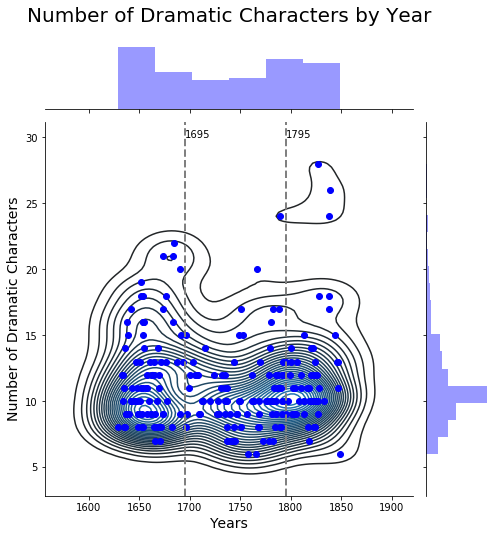

In [61]:
scatter(sorted_comedies, 
        'num_present_characters', 
        'Number of Dramatic Characters by Year', 
        'Number of Dramatic Characters',
         30)

### Mobility Coefficient

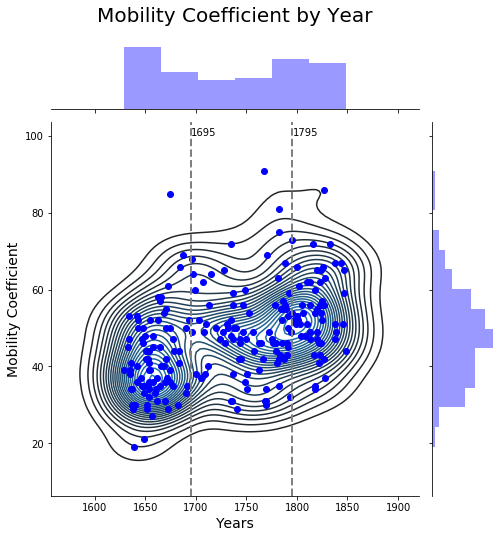

In [62]:
scatter(sorted_comedies, 
        'mobility_coefficient', 
        'Mobility Coefficient by Year', 
        'Mobility Coefficient',
         100)

### Standard Range of the Number of Speaking Characters

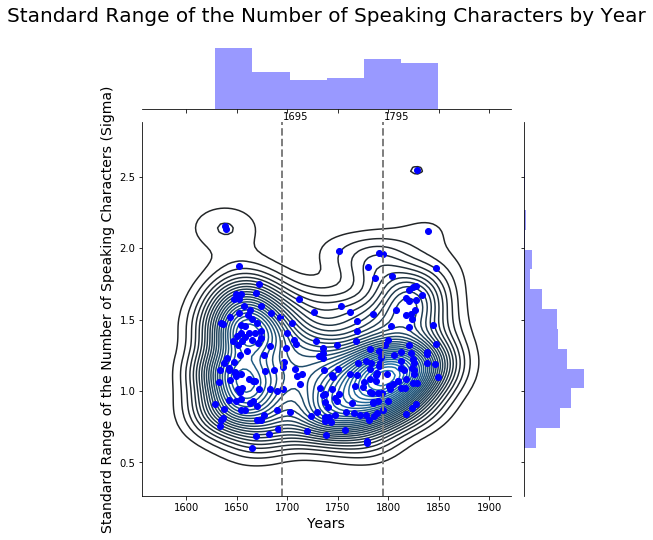

In [63]:
scatter(sorted_comedies, 
        'sigma_iarkho', 
        'Standard Range of the Number of Speaking Characters by Year', 
        'Standard Range of the Number of Speaking Characters (Sigma)',
         2.9)

###  The Percentage of Non-Dialogues

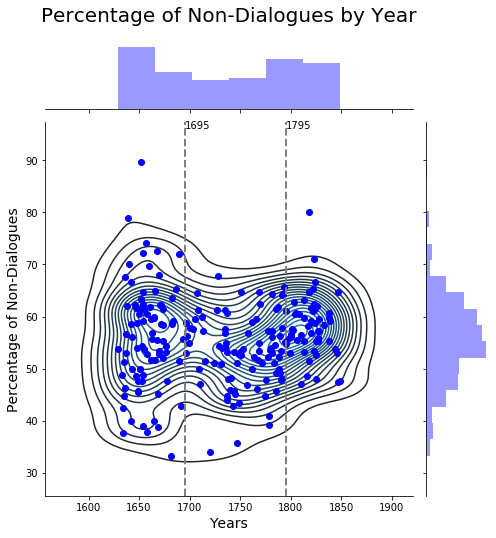

In [64]:
scatter(sorted_comedies, 
        'percentage_non_dialogues', 
        'Percentage of Non-Dialogues by Year', 
        'Percentage of Non-Dialogues',
         96)

### The Percentage of Polylogues

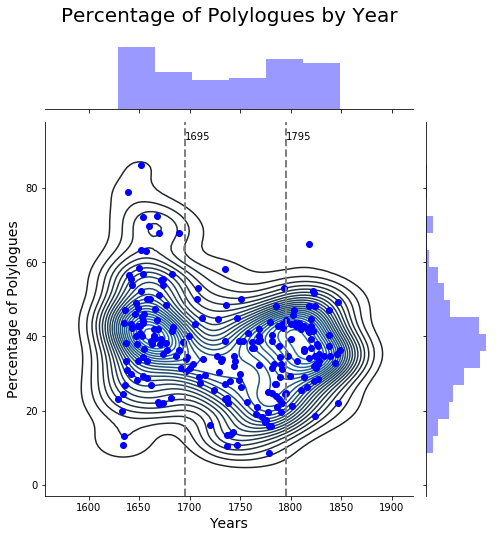

In [65]:
scatter(sorted_comedies, 
        'percentage_polylogues', 
        'Percentage of Polylogues by Year', 
        'Percentage of Polylogues',
         93)

### The Percentage of Monologues

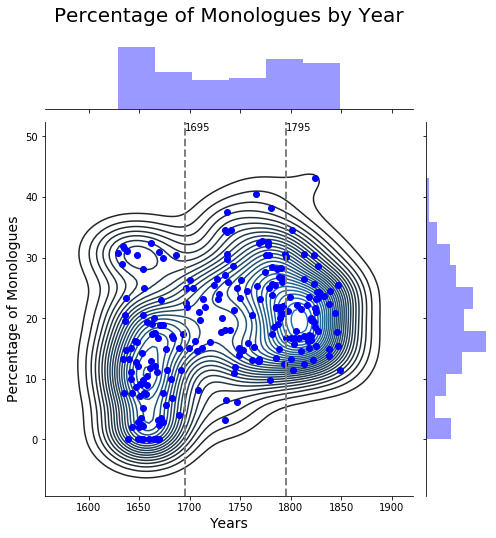

In [66]:
scatter(sorted_comedies, 
        'percentage_monologues', 
        'Percentage of Monologues by Year', 
        'Percentage of Monologues',
         51)

## Part 5. Descriptive Statistics for Each Period

### Number of Dramatic Characters

In [67]:
sorted_comedies.groupby('period').describe().loc[:, 'num_present_characters'][['mean', 'std', '50%','min', 'max']]

,mean,std,50%,min,max
period,,,,,
1,11.807229,3.623964,11.0,7.0,22.0
2,10.637363,2.998209,10.0,6.0,24.0
3,11.962963,4.260228,11.0,6.0,28.0


### Mobility Coefficient

In [68]:
sorted_comedies.groupby('period').describe().loc[:, 'mobility_coefficient'][['mean', 'std', '50%','min', 'max']]

,mean,std,50%,min,max
period,,,,,
1,41.819277,10.751227,40.0,19.0,85.0
2,49.560440,11.650664,49.0,29.0,91.0
3,54.314815,9.956176,53.5,34.0,86.0


### Standard Range of the Number of Speaking Characters (Sigma)

In [69]:
sorted_comedies.groupby('period').describe().loc[:, 'sigma_iarkho'][['mean', 'std', '50%','min', 'max']]

,mean,std,50%,min,max
period,,,,,
1,1.226639,0.327617,1.1930,0.602,2.154
2,1.123912,0.297199,1.0950,0.633,1.977
3,1.330148,0.328020,1.2575,0.840,2.545


### The Percentage of Non-Dialogues

In [70]:
sorted_comedies.groupby('period').describe().loc[:, 'percentage_non_dialogues'][['mean', 'std', '50%','min', 'max']]

,mean,std,50%,min,max
period,,,,,
1,56.113735,10.004842,55.770,33.33,89.66
2,53.497692,6.761437,53.490,34.00,67.69
3,58.124074,5.889360,57.915,47.06,80.00


### The Percentage of Polylogues

In [71]:
sorted_comedies.groupby('period').describe().loc[:, 'percentage_polylogues'][['mean', 'std', '50%','min', 'max']]

,mean,std,50%,min,max
period,,,,,
1,42.810602,14.359504,41.460,10.64,86.21
2,31.371538,10.785492,31.580,8.70,58.06
3,37.694259,8.488410,36.825,18.46,65.00


###  The Percentage of Monologues

In [72]:
sorted_comedies.groupby('period').describe().loc[:, 'percentage_monologues'][['mean', 'std', '50%','min', 'max']]

,mean,std,50%,min,max
period,,,,,
1,13.178675,9.388055,12.070,0.00,32.43
2,22.084725,7.621376,22.030,3.23,40.48
3,20.353519,5.966186,19.575,11.36,43.08


### Summary:
1. The pace of the comedy over the centuries accelerates. The mobility coefficient rises from period one through three (median in period one - 40, in period two - 49, and in period three 53.5). However, the standard deviation grows from period one (10.751227) to period two (11.650664), but then decreases in period three (9.956176). There is less variance in period three - high mobility is the new norm.
2. Two features (the number of dramatic characters and the standard range of the number of speaking characters) have higher medians and standard deviations in periods one and three and a dip in period two. The median number of characters in period one is 11, in period two - 10, and in period three - 11. The standard deviation of the number of dramatic characters in period one is 3.623964, in period two - 2.998209, and in period three - 4.260228. The median standard range of the number of speaking characters in period one is 1.1930, in period two - 1.0950, and in perid three - 1.2575. 
3. The median percentage of polylogues was the highest in period one (41.460). In period two, it dropped to 31.580, and increased again in period three (36.825), however, not as high as period one. The standard deviation decreased over time: from 14.359504 in period one, to 10.785492, and 8.488410 in period three.
4. On the contrary, the percentage of monologues (which is a feature of a more conservative style) was the lowest in the first period (median 12.070). It almost dubbled in the second period - 22.030, and decreased again in the third period - 19.575. The standard deviation, however, was the highest in the first period - 9.388055, lower in the second - 7.621376, and the lowest in the third - 5.966186.
5. The percentage of non-dialogues had a drop in the second period(the median percentage of non-dialogues in period one - 55.770, in period two - 53.490, and in period three - 57.915. However, the standard deviation was decreasing from period one through period three (from 10.004842 to 6.761437, and the lowest in period three - 5.889360). This also means that the percentage of dialogues is the highest in the second period.


## Conclusion
1. Based on the results of the Shapiro-Wilk normality tests, the following features are not normally distributed (the number of dramatic characters, the mobility coefficient, the standard range of the speaking characters (sigma), the percentage of non-dialogues, and the percentage of polylogues. We failed to reject the hypothesis of normal distrbution of the percentage of monologues (the probability of this feature being normally distributed was approx. 0.109).
2. Since most of the features were not normally distributed, we ran non-parametric statistical tests to determine if there are significant differences between the hypothesized four periods.
3. We establishes that there are statistical differences between periods two (from 1651 to 1695) and three (from 1696 to 1795) and periods three and four (from 1796 to 1847), whereas there is no statistically significant difference between periods one (from 1629 to 1650) and two (from 1651 to 1695).
4. We distinguish three periods of the French five-act comedy in verse:
    - Period one: from 1629 to 1695
    - Period two: from 1696 to 1795
    - Period three: from 1796 to 1847 